# Example 5: Special functions

Let's construct a dataset which contains special functions $f(x,y)={\rm exp}(J_0(20x)+y^2)$, where $J_0(x)$ is the Bessel function.

train loss: 1.49e-03 | test loss: 5.56e-03 | reg: 0.00e+00 : 100%|█| 100/100 [00:18<00:00,  5.48it/s


r2 is 0.9999917149543762
r2 is 0.9999998807907104
r2 is 0.9999801516532898
([1.02*exp(0.99*x_2**2 + 0.99*J0(-20.0*x_1)) - 0.02], [x_1, x_2])


train loss: 3.07e-04 | test loss: 3.19e-04 | reg: 0.00e+00 : 100%|██| 60/60 [00:01<00:00, 31.12it/s]


([1.0*exp(1.0*x_2**2 + 1.0*J0(-20.0*x_1))], [x_1, x_2])

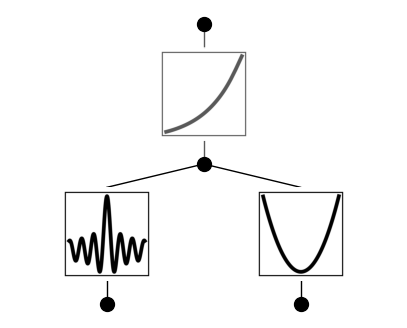

In [1]:
from better_kan import KAN, create_dataset, SYMBOLIC_LIB, add_symbolic
import torch

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,1,1],num_basis=50,symbolic_enabled=True)
f = lambda x: torch.exp(torch.special.bessel_j0(20*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
add_symbolic('J0', torch.special.bessel_j0)
# train the model
model.train(dataset, opt="LBFGS", steps=100,lr=0.1);
# model(dataset)
model.plot()
# model.auto_symbolic(a_range=(-40,40))
model.fix_symbolic(0,0,0,"J0",a_range=(-40,40))
model.fix_symbolic(0,1,0,"x^2")
model.fix_symbolic(1,0,0,"exp")
print(model.symbolic_formula())
model.train(dataset, opt="LBFGS", steps=60,lr=0.1);
# model(dataset)
model.symbolic_formula()

Plot trained KAN, the bessel function shows up in the bettom left

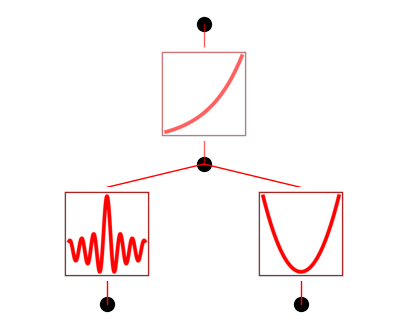

In [2]:
# model = model.prune()
model(dataset['train_input'])
model.plot()

suggest_symbolic does not return anything that matches with it, since Bessel function isn't included in the default SYMBOLIC_LIB. We want to add Bessel to it.

In [3]:
model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.5321823358535767
1/x^2 , 0.14147235453128815
J0 , 0.13140803575515747
1/x , 0.08777207881212234
tan , 0.08737275749444962


('gaussian',
 (<function better_kan.utils.<lambda>(x)>,
  <function better_kan.utils.<lambda>(x)>),
 0.5321823358535767)

In [4]:
SYMBOLIC_LIB.keys()

dict_keys(['x', 'x^2', 'x^3', 'x^4', '1/x', '1/x^2', '1/x^3', '1/x^4', 'sqrt', '1/sqrt(x)', 'exp', 'log', 'abs', 'sin', 'tan', 'tanh', 'sigmoid', 'sgn', 'arcsin', 'arctan', 'arctanh', '0', 'gaussian', 'cosh', 'J0'])

In [5]:
# add bessel function J0 to the symbolic library
# we should include a name and a pytorch implementation
add_symbolic('J0', torch.special.bessel_j0)

After adding Bessel, we check suggest_symbolic again

In [6]:
# J0 shows up but not top 1, why?

model.suggest_symbolic(0,0,0)

function , r2
gaussian , 0.5321823358535767
1/x^2 , 0.14147235453128815
J0 , 0.13140803575515747
1/x , 0.08777207881212234
tan , 0.08737275749444962


('gaussian',
 (<function better_kan.utils.<lambda>(x)>,
  <function better_kan.utils.<lambda>(x)>),
 0.5321823358535767)

In [7]:
# This is because the ground truth is J0(20x) which involves 20 which is too large.
# our default search is in (-10,10)
# so we need to set the search range bigger in order to include 20
# now J0 appears at the top of the list

model.suggest_symbolic(0,0,0,a_range=(-40,40))

function , r2
J0 , 1.0
sin , 0.5906145572662354
gaussian , 0.5725206732749939
1/x^2 , 0.1421986222267151
tan , 0.08832997828722


('J0', (<function torch._C._special.special_bessel_j0>, J0), 1.0)

In [8]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 1.38e-03 | test loss: 1.45e-03 | reg: 0.00e+00 : 100%|██| 20/20 [00:01<00:00, 10.58it/s]


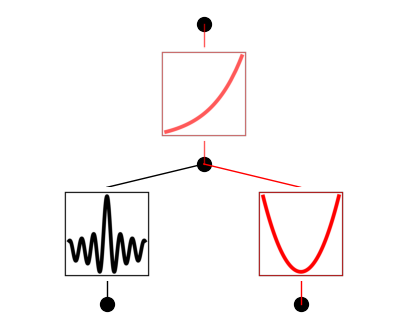

In [9]:
model.plot()

In [10]:
model.suggest_symbolic(0,0,0,a_range=(-40,40))

function , r2
J0 , 0.9999915957450867
gaussian , 0.635248601436615
sin , 0.5845378637313843
abs , 0.10728722810745239
tan , 0.0982363224029541


('J0',
 (<function torch._C._special.special_bessel_j0>, J0),
 0.9999915957450867)

Finish the rest of symbolic regression

In [11]:
model.fix_symbolic(0,0,0,'J0',a_range=(-40,40))

r2 is 0.9999915957450867


tensor(1.0000)

In [12]:
model.auto_symbolic()

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (1,0,0) since already symbolic


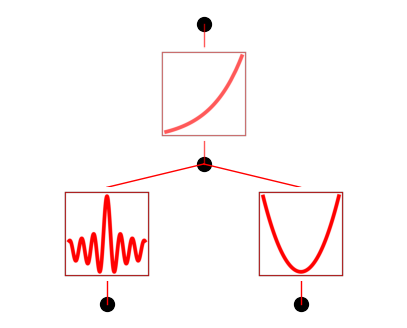

In [13]:
model.plot()

In [14]:
model.train(dataset, opt="LBFGS", steps=20);

train loss: 3.00e-04 | test loss: 3.04e-04 | reg: 0.00e+00 : 100%|██| 20/20 [00:03<00:00,  5.96it/s]


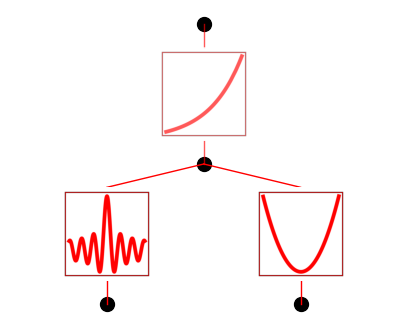

In [15]:
model.plot()

In [16]:
model.suggest_symbolic(1,0,0)

function , r2
exp , 1.000000238418579
sigmoid , 0.999988853931427
tanh , 0.9999802708625793
cosh , 0.9999700784683228
arctan , 0.9999257326126099


('exp',
 (<function better_kan.utils.<lambda>(x)>,
  <function better_kan.utils.<lambda>(x)>),
 1.000000238418579)

In [17]:
model.fix_symbolic(1,0,0,'exp')

r2 is 1.000000238418579


tensor(1.0000, grad_fn=<SelectBackward0>)

In [18]:
# why can't we reach machine precision (because LBFGS early stops?)? The symbolic formula is correct though.
model.train(dataset, opt="LBFGS", steps=50);
model.symbolic_formula()[0][0]

train loss: 2.99e-04 | test loss: 3.05e-04 | reg: 0.00e+00 : 100%|██| 50/50 [00:08<00:00,  5.71it/s]


1.0*exp(1.0*x_2**2 + 1.0*J0(-20.0*x_1))